In [1]:
# Setting up a custom stylesheet in IJulia
file = open("style.css") # A .css file in the same folder as this notebook file
style = read(file, String) # Read the file
HTML("$style") # Output as HTML

HTML{String}("<link href='http://fonts.googleapis.com/css?family=Alegreya+Sans:100,300,400,500,700,800,900,100italic,300italic,400italic,500italic,700italic,800italic,900italic' rel='stylesheet' type='text/css'>\n<link href='http://fonts.googleapis.com/css?family=Arvo:400,700,400italic' rel='stylesheet' type='text/css'>\n<link href='http://fonts.googleapis.com/css?family=PT+Mono' rel='stylesheet' type='text/css'>\n<link href='http://fonts.googleapis.com/css?family=Shadows+Into+Light' rel='stylesheet' type='text/css'>\n<link href='http://fonts.googleapis.com/css?family=Philosopher:400,700,400italic,700italic' rel='stylesheet' type='text/css'>\n\n<style>\n\n@font-face {\n    font-family: \"Computer Modern\";\n    src: url('http://mirrors.ctan.org/fonts/cm-unicode/fonts/otf/cmunss.otf');\n}\n\n#notebook_panel { /* main background */\n    background: #ddd;\n    color: #000000;\n}\n\n\n\n/* Formatting for header cells */\n.text_cell_render h1 {\n    font-family: 'Philosopher', sans-serif;\n    font-weight: 400;\n    font-size: 2.2em;\n    line-height: 100%;\n    color: rgb(0, 80, 120);\n    margin-bottom: 0.1em;\n    margin-top: 0.1em;\n    display: block;\n}\t\n.text_cell_render h2 {\n    font-family: 'Philosopher', serif;\n    font-weight: 400;\n    font-size: 1.9em;\n    line-height: 100%;\n    color: rgb(200,100,0);\n    margin-bottom: 0.1em;\n    margin-top: 0.1em;\n    display: block;\n}\t\n\n.text_cell_render h3 {\n    font-family: 'Philosopher', serif;\n    margin-top:12px;\n    margin-bottom: 3px;\n    font-style: italic;\n    color: rgb(94,127,192);\n}\n\n.text_cell_render h4 {\n    font-family: 'Philosopher', serif;\n}\n\n.text_cell_render h5 {\n    font-family: 'Alegreya Sans', sans-serif;\n    font-weight: 300;\n    font-size: 16pt;\n    color: grey;\n    font-style: italic;\n    margin-bottom: .1em;\n    margin-top: 0.1em;\n    display: block;\n}\n\n.text_cell_render h6 {\n    font-family: 'PT Mono', sans-serif;\n    font-weight: 300;\n    font-size: 10pt;\n    color: grey;\n    margin-bottom: 1px;\n    margin-top: 1px;\n}\n\n.CodeMirror{\n        font-family: \"PT Mono\";\n        font-size: 100%;\n}\n\n</style>\n\n")

In [2]:
# Checking the kernel
# These are uncertain times :)
+(2, 2)

4

# Using Julia 1.0 for introductory statistics

## Introduction

Julia is well suited to general purpose data analysis.  It has many built-in statistical functions and there are many packages that greatly extend the capabilities of Julia as a scientific programming language for statistics.

In this section we will take a look at introductory statistics using Julia 1.0.  There are differences between this version of Julia and version 0.6.  Not all the packages that are available for version 0.6 and prior, are quite ready for version 1.0.  At the time of recording the packages that are used in this section do all compile and can be used.

In the first part of this section of the course, we will take a look at creating our own data for statistical analysis.  It is great to be able to generate simulated data, especially when you are just starting out and might not have access to proper datasets.

When viewing a new dataset, it is alway good to start by describing it.  Human beings are not designed to look at large tables of data and understand what it is trying to tell us.  Using summarizing, or descriptive, statistics helps us to gain an insight into the data before we start to analyze it.

This section will also look at visualizing data.  It many cases, this allows for an even better understanding of the data.

The `HypothesisTests` and `GLM` packages allow us to do many common statistical tests and we will have a look at Student's _t_ test, linear regression models, and the $\chi^2$ test for independence.

We will conclude with a look at exporting our data in the form of a spreadsheet.  Let's start, though, by importing the packages that we will be using.

## Adding packages

If the packages that are listed below are not installed on your system, then do the following for each package, i.e. `PyPlot`.

```
using Pkg;
Pkg.add("PyPlot")
```

In [3]:
import Pkg

Pkg.add("Distributions")
Pkg.add("StatsBase")
Pkg.add("CSV")
Pkg.add("DataFrames")
Pkg.add("HypothesisTests")
Pkg.add("StatsPlots")
Pkg.add("GLM")
Pkg.add("GR")

   Resolving package versions...


  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`


   Resolving package versions...


    Updating `~/.julia/environments/v1.10/Project.toml`
  [2913bbd2] + StatsBase v0.34.2
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`


   Resolving package versions...


   Installed WorkerUtilities ─ v1.6.1
   Installed WeakRefStrings ── v1.4.2
   Installed FilePathsBase ─── v0.9.21


   Installed CSV ───────────── v0.10.12


    Updating `~/.julia/environments/v1.10/Project.toml`
  [336ed68f] + CSV v0.10.12
    Updating `~/.julia/environments/v1.10/Manifest.toml`
 

 [336ed68f] + CSV v0.10.12
  [48062228] + FilePathsBase v0.9.21
  [ea10d353] + WeakRefStrings v1.4.2
  [76eceee3] + WorkerUtilities v1.6.1


Precompiling 

project...


  ✓ WorkerUtilities


  ✓ WeakRefStrings


  ✓ FilePathsBase


  ✓ CSV
  4 dependencies successfully precompiled in 12 seconds. 213 already precompiled.
   Resolving package versions...


  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`


   Resolving package versions...


  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`


   Resolving package versions...


   Installed FFTW ────────────── v1.8.0
   Installed IntelOpenMP_jll ─── v2024.0.2+0


   Installed Distances ───────── v0.10.11
   Installed StaticArraysCore ── v1.4.2
   Installed StatsPlots ──────── v0.15.6
   Installed Ratios ──────────── v0.4.5
   Installed OffsetArrays ────── v1.13.0
   Installed StaticArrays ────── v1.9.1
   Installed NearestNeighbors ── v0.4.16
   Installed Clustering ──────── v0.15.7


   Installed MKL_jll ─────────── v2024.0.0+0
   Installed FFTW_jll ────────── v3.3.10+0
   Installed Widgets ─────────── v0.6.6
   Installed KernelDensity ───── v0.6.8
   Installed AbstractFFTs ────── v1.5.0
   Installed MultivariateStats ─ v0.10.2
   Installed Adapt ───────────── v3.7.2


   Installed Arpack_jll ──────── v3.5.1+1
   Installed TableOperations ─── v1.2.0
   Installed AxisAlgorithms ──── v1.0.1
   Installed WoodburyMatrices ── v0.5.6
   Installed Observables ─────── v0.5.5
   Installed Arpack ──────────── v0.5.4


   Installed Interpolations ──── v0.14.7


    Updating `~/.julia/environments/v1.10/Project.toml`
  [f3b207a7] + StatsPlots v0.15.6
    Updating `~/.julia/environments/v1.10/Manifest.toml`
  [621f4979] + AbstractFFTs v1.5.0
⌅ [79e6a3ab] + Adapt v3.7.2
  [7d9fca2a] + Arpack v0.5.4
⌃ [13072b0f] + AxisAlgorithms v1.0.1
  [aaaa29a8] + Clustering v0.15.7
  [b4f34e82] + Distances v0.10.11
  [7a1cc6ca] + FFTW v1.8.0
⌅ [a98d9a8b] + Interpolations v0.14.7
  [5ab0869b] + KernelDensity v0.6.8
  [6f286f6a] + MultivariateStats v0.10.2
  [b8a86587] + NearestNeighbors v0.4.16
  [510215fc] + Observables v0.5.5
  [6fe1bfb0] + OffsetArrays v1.13.0
  [c84ed2f1] + Ratios v0.4.5
  [90137ffa] + StaticArrays v1.9.1
  [1e83bf80] + StaticArraysCore v1.4.2
  [f3b207a7] + StatsPlots v0.15.6
  [ab02a1b2] + TableOperations v1.2.0
  [cc8bc4a8] + Widgets v0.6.6
⌅ [efce3f68] + WoodburyMatrices v0.5.6
⌅ [68821587] + Arpack_jll v3.5.1+1
  [f5851436] + FFTW_jll v3.3.10+0
  [1d5cc7b8] + IntelOpenMP_jll v2024.0.2+0
  [856f044c] + MKL_jll v2024.0.0+0
  [8ba89e20] 

Precompiling project...


  ✓ Ratios
  ✓ Adapt
  ✓ StaticArraysCore


  ✓ Observables
  ✓ IntelOpenMP_jll
  ✓ AbstractFFTs


  ✓ TableOperations
  ✓ FFTW_jll
  ✓ Arpack_jll
  ✓ WoodburyMatrices


  ✓ Distances
  ✓ AbstractFFTs → AbstractFFTsChainRulesCoreExt
  ✓ Ratios → RatiosFixedPointNumbersExt


  ✓ OffsetArrays


  ✓ Arpack


  ✓ AxisAlgorithms


  ✓ OffsetArrays → OffsetArraysAdaptExt
  ✓ Widgets


  ✓ Distances → DistancesSparseArraysExt


  ✓ Distances → DistancesChainRulesCoreExt


  ✓ AbstractFFTs → AbstractFFTsTestExt


  ✓ MultivariateStats


  ✓ StaticArrays


  ✓ Adapt → AdaptStaticArraysExt
  ✓ ConstructionBase → ConstructionBaseStaticArraysExt


  ✓ StaticArrays → StaticArraysStatisticsExt


  ✓ Accessors → AccessorsStaticArraysExt


  ✓ StaticArrays → StaticArraysChainRulesCoreExt


  ✓ Interpolations


  ✓ NearestNeighbors


  ✓ Clustering


MKL_jll Waiting for background task / IO / timer.
[pid 898494] waiting for IO to finish:
 Handle type        uv_handle_t->data
 timer              0x1ae7c70->0x7f2e06359f00
This means that a package has started a background task or event source that has not finished running. For precompilation to complete successfully, the event source needs to be closed explicitly. See the developer documentation on fixing precompilation hangs for more help.



[pid 898494] waiting for IO to finish:
 Handle type        uv_handle_t->data
 timer              0x1ae7c70->0x7f2e06359f00
This means that a package has started a background task or event source that has not finished running. For precompilation to complete successfully, the event source needs to be closed explicitly. See the developer documentation on fixing precompilation hangs for more help.


  ✓ MKL_jll


  ✓ FFTW


  ✓ KernelDensity


  ✓ StatsPlots
  35 dependencies successfully precompiled in 49 seconds. 220 already precompiled.
  1 dependency had output during precompilation:
┌ MKL_jll
│   Downloading artifact: MKL
│  
│  [pid 898494] waiting for IO to finish:
│   Handle type        uv_handle_t->data
│   timer              0x1ae7c70->0x7f2e06359f00
│  This means that a package has started a background task or event source that has not finished running. For precompilation to complete successfully, the event source needs to be closed explicitly. See the developer documentation on fixing precompilation hangs for more help.
│  
│  [pid 898494] waiting for IO to finish:
│   Handle type        uv_handle_t->data
│   timer              0x1ae7c70->0x7f2e06359f00
│  This means that a package has started a background task or event source that has not finished running. For precompilation to complete successfully, the event source needs to be closed explicitly. See the developer documentation on fixing precompilation hangs fo

  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`


   Resolving package versions...


    Updating `~/.julia/environments/v1.10/Project.toml`
  [28b8d3ca] + GR v0.73.1
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`


In [4]:
using Distributions    # Create random variables
using StatsBase        # Basic statistical support
using CSV              # Reading and writing CSV files
using DataFrames       # Create a data structure
using HypothesisTests  # Perform statistical tests
using StatsPlots       # Statistical plotting
using GLM              # General linear models

We recommend using GR backend instead of PyPlot backend.

In [5]:
gr()                   # Use GR Backend

Plots.GRBackend()

## Creating random variable

We mentioned in the introduction that the creation of simulated data is a great way to start learning how to use Julia for statistics.  In the code below, we create five variables with random data point values.

In [6]:
age = rand(18:80, 100);  # Uniform distribution
wcc = round.(rand(Distributions.Normal(12, 2), 100), digits = 1)  # Normal distribution & round to one decimal place
crp = round.(Int, rand(Distributions.Chisq(4), 100)) .* 10  # Chi-squared distribution with broadcasting & alternate round()
treatment = rand(["A", "B"], 100); # Uniformly weighted
result = rand(["Improved", "Static", "Worse"], 100);  # Uniformly weighted

## Descriptive statistics

While there are common statistical function in Julia such as `mean()` and `std()`, it is more convenient to use the `describe()` function from the `StatsBase` package.

In [7]:
# Mean of the age variable
mean(age)

46.35

In [8]:
# Median of age variable
median(age)

46.0

In [9]:
# Standard deviation of age
std(age)

18.25983891417767

In [10]:
# Variance of age
var(age)

333.42171717171715

In [11]:
# Mean of wcc
mean(wcc)

11.767999999999999

In [12]:
# Standard deviation of wcc
std(wcc)

2.027581531945601

In [13]:
# Descriptive statistics of the age variable
StatsBase.describe(age)

Summary Stats:
Length:         100
Missing Count:  0
Mean:           46.350000
Std. Deviation: 18.259839
Minimum:        18.000000
1st Quartile:   30.000000
Median:         46.000000
3rd Quartile:   60.250000
Maximum:        80.000000
Type:           Int64


In [14]:
# The summarystats() function omits the length and type
StatsBase.summarystats(wcc)

Summary Stats:
Length:         100
Missing Count:  0
Mean:           11.768000
Std. Deviation: 2.027582
Minimum:        7.400000
1st Quartile:   10.375000
Median:         11.750000
3rd Quartile:   12.900000
Maximum:        17.300000


## Creating a dataframe

When creating simulated data, it is best to store it in a dataframe object for easier manipulation.

In [15]:
data = DataFrame(Age = age, WCC = wcc, CRP = crp, Treatment = treatment, Result = result);

In [16]:
# Number of rows and columns
size(data)

(100, 5)

In [17]:
# First six rows. Note that head() method has been deprecated.
first(data, 6)

Row,Age,WCC,CRP,Treatment,Result
,Int64,Float64,Int64,String,String
1,49,11.0,30,B,Worse
2,30,11.4,30,A,Improved
3,75,9.5,40,B,Improved
4,25,12.7,10,A,Improved
5,19,10.3,10,B,Static
6,51,13.5,20,A,Improved


We can create dataframe objects by selecting only subjects according to their data point values for a particular variable. 

**Note that dataframe slicing using `data[data[:Treatment] .== "A", :]` has been deprecated from the video lecture. Use below slicing method.**

In [18]:
dataA = data[data[:, :Treatment] .== "A", :]   # Only patient in treatment group A
dataB = data[data[:, :Treatment] .== "B", :];  # Only patient in treatment group B

In [19]:
# Show first 5 rows from dataA
first(dataA, 5)

Row,Age,WCC,CRP,Treatment,Result
,Int64,Float64,Int64,String,String
1,30,11.4,30,A,Improved
2,25,12.7,10,A,Improved
3,51,13.5,20,A,Improved
4,74,11.6,30,A,Improved
5,27,13.3,70,A,Worse


In [20]:
# Show last 5 rows from dataB
last(dataB, 5)

Row,Age,WCC,CRP,Treatment,Result
,Int64,Float64,Int64,String,String
1,62,7.5,30,B,Improved
2,72,10.0,30,B,Static
3,46,12.2,60,B,Improved
4,74,9.4,20,B,Improved
5,80,11.3,40,B,Worse


## Descriptive statistics using the dataframe object

The `describe()` function will attempt to provide descriptive statistics of the a data object.

In [21]:
describe(data)

Row,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Int64,DataType
1,Age,46.35,18,46.0,80,0,Int64
2,WCC,11.768,7.4,11.75,17.3,0,Float64
3,CRP,43.4,0,30.0,150,0,Int64
4,Treatment,,A,,B,0,String
5,Result,,Improved,,Worse,0,String


We can count the number of the elements in the sample space of a categorical variable using the `combine()` function. 

**Note that previously used `by()` method has been deprecated**. Use `combine()` instead with the grouped dataframes.

In [22]:
# Define grouped data
grouped_df = groupby(data, :Treatment);

In [23]:
# Counting the number of patients in groups A and B
combine(grouped_df, nrow => :N)

Row,Treatment,N
,String,Int64
1,B,56
2,A,44


In [24]:
# The size argument will give the same output other than adding the number of variables i.e. 5 columns
# size() returns tuple containing row and column numbers
combine(size, grouped_df)

Row,Treatment,x1
,String,Tuple…
1,B,"(56, 5)"
2,A,"(44, 5)"


The usual descriptive statistics of a numerical variable can be calculated after separation by a categorical variable.

In [25]:
# Mean age of groups A and B patients
combine(grouped_df, :Age => mean)

Row,Treatment,Age_mean
,String,Float64
1,B,50.4821
2,A,41.0909


In [26]:
# Standard deviation of groups A and B patients
combine(grouped_df, :Age => std)

Row,Treatment,Age_std
,String,Float64
1,B,18.1939
2,A,17.138


By using the `summarystats()` function we can get all the descriptive statistics.

In [27]:
combine(grouped_df, :Age => describe)

Summary Stats:
Length:         56
Missing Count:  0
Mean:           50.482143
Std. Deviation: 18.193896
Minimum:        18.000000
1st Quartile:   35.750000
Median:         50.000000
3rd Quartile:   67.000000
Maximum:        80.000000
Type:           Int64


Summary Stats:
Length:         44
Missing Count:  0
Mean:           41.090909
Std. Deviation: 17.138042
Minimum:        18.000000
1st Quartile:   26.750000
Median:         37.000000
3rd Quartile:   51.500000
Maximum:        78.000000
Type:           Int64


Row,Treatment,Age_describe
,String,Nothing
1,B,
2,A,


## Visualizing the data

The Plots package works well with the DataFrames package by allowing macro function from the latter.  In the code cell below, we look at the age distribution of the two treatment groups.

Note that `@df` macro (from StatsPlots) is used to pass the columns to the function.

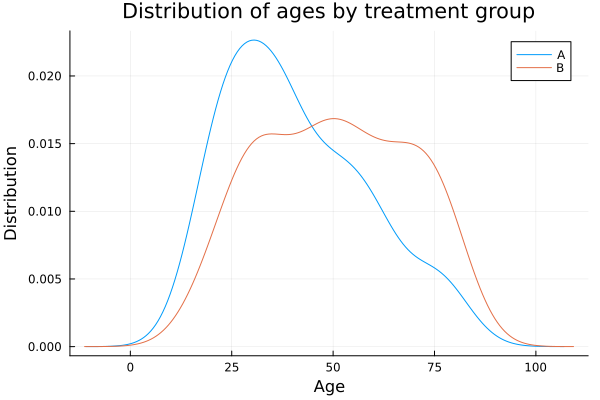

In [28]:
@df data density(:Age, group = :Treatment, title = "Distribution of ages by treatment group",
    xlab = "Age", ylab = "Distribution",
    legend = :topright)

We can do the same for the results groups.

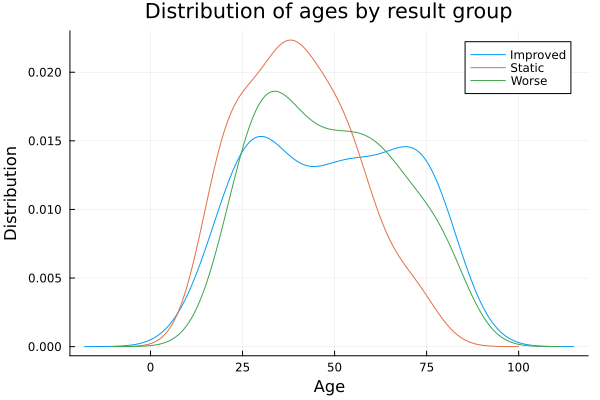

In [29]:
@df data density(:Age, group = :Result, title = "Distribution of ages by result group",
    xlab = "Age", ylab = "Distribution",
    legend = :topright)

We can even discriminate between all of the groups.

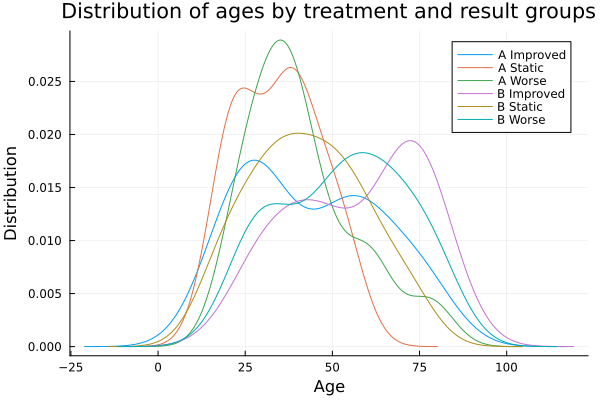

In [30]:
@df data density(:Age, group = (:Treatment, :Result), title = "Distribution of ages by treatment and result groups",
    xlab = "Age", ylab = "Distribution",
    legend = :topright)

Let's create a box-and-whisker plot of the white cell count per treatment group and then per result group.

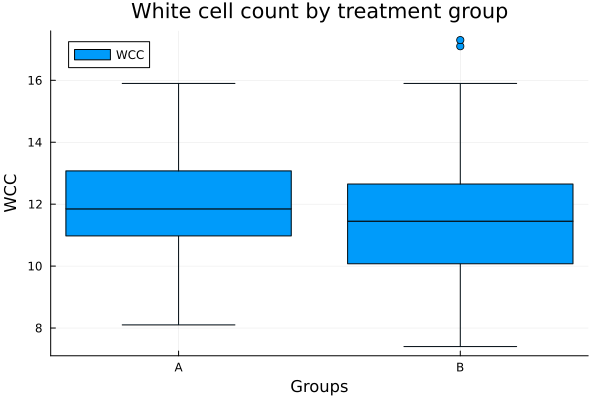

In [31]:
@df data boxplot(:Treatment, :WCC, lab = "WCC", title = "White cell count by treatment group",
    xlab = "Groups", ylab = "WCC")

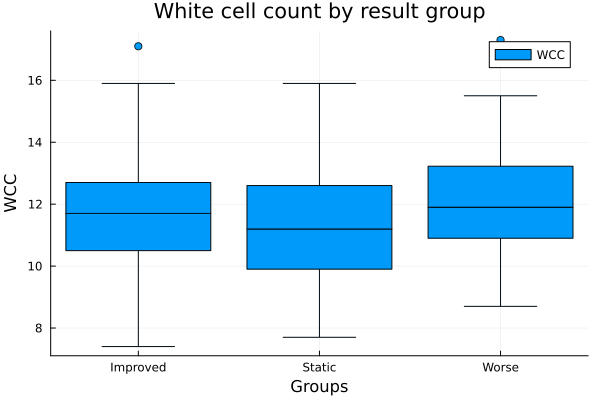

In [32]:
@df data boxplot(:Result, :WCC, lab = "WCC", title = "White cell count by result group",
    xlab = "Groups", ylab = "WCC")

Finally, we will check on the correlation between the numerical variables using a correlation plot and a corner plot.

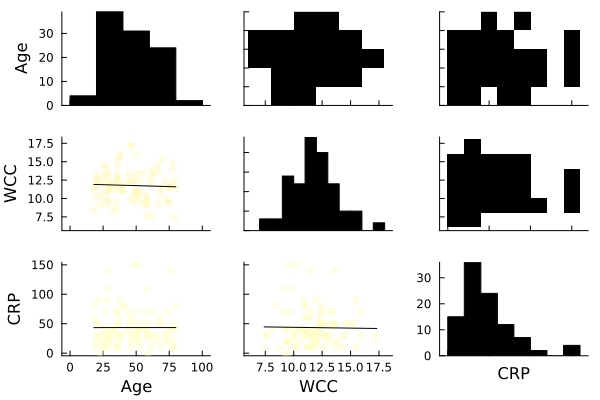

In [33]:
@df data corrplot([:Age :WCC :CRP], grid = false)  # No comma's between arguments in list

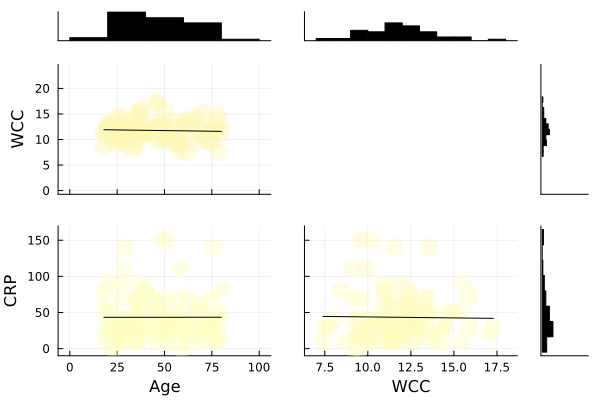

In [34]:
@df data cornerplot([:Age :WCC :CRP], grid = false, compact = true)

## Inferential statistics

We will begin by using Student's _t_ test to compare the mean of a numerical variable between two groups. 

In [35]:
# Difference in age between patients in groups A and B
HypothesisTests.EqualVarianceTTest(dataA[:, :Age], dataB[:, :Age])

Two sample t-test (equal variance)
----------------------------------
Population details:
    parameter of interest:   Mean difference
    value under h_0:         0
    point estimate:          -9.39123
    95% confidence interval: (-16.48, -2.3)

Test summary:
    outcome with 95% confidence: reject h_0
    two-sided p-value:           0.0100

Details:
    number of observations:   [44,56]
    t-statistic:              -2.628026309656542
    degrees of freedom:       98
    empirical standard error: 3.5734930551213187


In [36]:
# Only the p value for the difference in white cell count between patients in groups A and B
pvalue(EqualVarianceTTest(dataA[:, :WCC], dataB[:, :WCC]))

0.593595312808806

In [37]:
# Difference in c-reactive protein level between patients in groups A and B for unequal variances
UnequalVarianceTTest(dataA[:, :CRP], dataB[:, :CRP])

Two sample t-test (unequal variance)
------------------------------------
Population details:
    parameter of interest:   Mean difference
    value under h_0:         0
    point estimate:          -2.01299
    95% confidence interval: (-14.77, 10.74)

Test summary:
    outcome with 95% confidence: fail to reject h_0
    two-sided p-value:           0.7547

Details:
    number of observations:   [44,56]
    t-statistic:              -0.3134126938014785
    degrees of freedom:       91.25895061437977
    empirical standard error: 6.422799882706968


We can create a variety of linear models using the `GLM.fit()` function.

In [38]:
# Simple model predicting CRP
fit(LinearModel, @formula(CRP ~ 1), data)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

CRP ~ 1

Coefficients:
─────────────────────────────────────────────────────────────────────
             Coef.  Std. Error      t  Pr(>|t|)  Lower 95%  Upper 95%
─────────────────────────────────────────────────────────────────────
(Intercept)   43.4     3.16298  13.72    <1e-23     37.124     49.676
─────────────────────────────────────────────────────────────────────

In [39]:
# Adding Age as a predictor variable
fit(LinearModel, @formula(CRP ~ Age), data)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

CRP ~ 1 + Age

Coefficients:
───────────────────────────────────────────────────────────────────────────
                    Coef.  Std. Error     t  Pr(>|t|)  Lower 95%  Upper 95%
───────────────────────────────────────────────────────────────────────────
(Intercept)  43.3705         8.7111    4.98    <1e-05  26.0836    60.6574
Age           0.000636195    0.174979  0.00    0.9971  -0.346604   0.347877
───────────────────────────────────────────────────────────────────────────

In [40]:
# Adding Age and WCC as predictor variables
fit(LinearModel, @formula(CRP ~ Age + WCC), data)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

CRP ~ 1 + Age + WCC

Coefficients:
────────────────────────────────────────────────────────────────────────────
                    Coef.  Std. Error      t  Pr(>|t|)  Lower 95%  Upper 95%
────────────────────────────────────────────────────────────────────────────
(Intercept)  46.6226         20.9501    2.23    0.0284   5.04244   88.2027
Age          -0.000752145     0.17604  -0.00    0.9966  -0.350143   0.348639
WCC          -0.270879        1.58537  -0.17    0.8647  -3.4174     2.87564
────────────────────────────────────────────────────────────────────────────

We can conduct a $\chi^2$ test for independence using the `HypothesisTests.ChisqTest()` function.  First we need to look at the counts.  Below we calculate the number of unique values for the Result variable sample space for patients in groups A and B.

Again note, that we use `combine()` instead of deprecated `by()` method.

In [41]:
combine(groupby(dataA, :Result), nrow => :N)

Row,Result,N
,String,Int64
1,Improved,20
2,Worse,14
3,Static,10


In [42]:
combine(groupby(dataB, :Result), nrow => :N)

Row,Result,N
,String,Int64
1,Worse,24
2,Improved,13
3,Static,19


In [43]:
# Enter the data in similar order here
observed = reshape([22, 17, 18, 18, 11, 14], (2, 3))
observed

2×3 Matrix{Int64}:
 22  18  11
 17  18  14

In [44]:
ChisqTest(observed)

Pearson's Chi-square Test
-------------------------
Population details:
    parameter of interest:   Multinomial Probabilities
    value under h_0:         [0.1989, 0.1911, 0.1836, 0.1764, 0.1275, 0.1225]
    point estimate:          [0.22, 0.17, 0.18, 0.18, 0.11, 0.14]
    95% confidence interval: [(0.13, 0.3184), (0.08, 0.2684), (0.09, 0.2784), (0.09, 0.2784), (0.02, 0.2084), (0.05, 0.2384)]

Test summary:
    outcome with 95% confidence: fail to reject h_0
    one-sided p-value:           0.6183

Details:
    Sample size:        100
    statistic:          0.9614102051076865
    degrees of freedom: 2
    residuals:          [0.473113, -0.482672, -0.0840168, 0.0857143, -0.490098, 0.5]
    std. residuals:     [0.865371, -0.865371, -0.15003, 0.15003, -0.808452, 0.808452]


## Exporting a CSV file

Finally we can export our dataframe object as a spreadsheet file.

In [45]:
CSV.write("ProjectData_1_point_0.csv", data);

-----